# Group brands

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import entropy
from tabulate import tabulate
from pymongo import MongoClient
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,8)


db = MongoClient()['stores']

TOTAL_NUMBER_OF_PRODUCTS = db.data.count()

results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$brand",
                "count": {"$sum": 1},
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        }
    ]
)

ALL_BRANDS = [(str(x['_id']), x['count']) for x in list(results)]
print('Number of uniq. brands: {}'.format(len(ALL_BRANDS)))

Number of uniq. brands: 338


Distributor      Number of uniq. Brands
-------------  ------------------------
marsha                              123
ignacia                             114
titus                                78
evie                                 73
larry                                72
jeneva                               66
patti                                58
kina                                 40
shemeka                              33
wendell                              31
major                                22
joanie                               16
carey                                15
rossana                              15
yolande                              12
rubi                                 10
ciara                                 1
allegra                               1
denisha                               1
zack                                  1


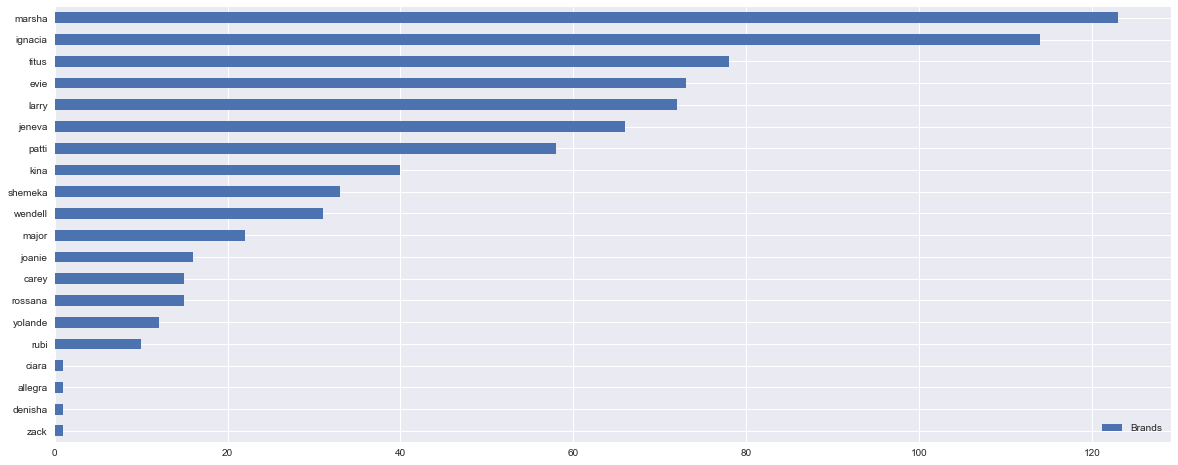

In [3]:
DISTRIBUTORS = list(db.data.distinct("source"))
results = db.data.aggregate(
    [
        {
            "$group": {
                "_id": "$source",
                "brands": {"$addToSet": "$brand"},
            }
        },
        {
            "$project": {
                "_id": 1,
                "count": {"$size": "$brands"}
            }
        },
        {
            "$sort": {
                "count": -1,
            }
        }
    ]
)
BRANDS_PER_DISTRIBUTOR = [
    (str(x['_id']), x['count']) 
    for x in list(results)
]
print(tabulate(BRANDS_PER_DISTRIBUTOR, 
               headers=['Distributor', 'Number of uniq. Brands'], 
               tablefmt="simple"))

df_values_by_key = pd.DataFrame(BRANDS_PER_DISTRIBUTOR, 
                                index=[x[0] for x in BRANDS_PER_DISTRIBUTOR], 
                                columns=['Distributor', 'Brands'])
df_values_by_key.iloc[::-1].plot.barh()